In [52]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [67]:
df=pd.read_csv('emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [7]:
df.shape

(2132, 2549)

<IPython.core.display.Javascript object>


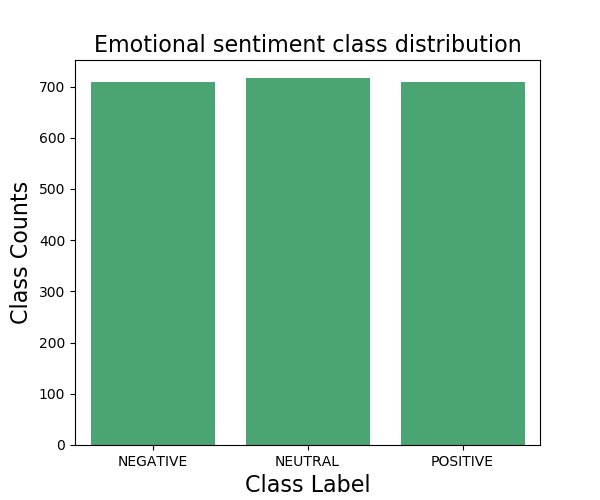

Text(0.5,0,'Class Label')

In [73]:
plt.figure(figsize=(6,5))
sns.countplot(x=df.label, color='mediumseagreen')
plt.title('Emotional sentiment class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)


In [4]:
dic={'POSITIVE':1,'NEGATIVE':-1,'NEUTRAL':0}
df.label=[dic[item] for item in df.label]
df.head().label

0   -1
1    0
2    1
3    1
4    0
Name: label, dtype: int64

In [5]:
y=df['label']
X=df[df.columns[:-1]]
print(y.shape)
print(X.shape)

(2132,)
(2132, 2548)


**TRAIN - TEST SPLIT 1**

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1918, 2548)
(1918,)
(214, 2548)
(214,)


**WITHOUT PCA**

In [12]:
##LOGISTIC REGRESSION

logreg=LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)
logreg.fit(x_train,y_train)
scores=cross_val_score(logreg,x_test,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',logreg.score(x_train,y_train))

Mean cross Val score =  0.4566655274550012
Accuracy on train data =  0.5224191866527633


In [13]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
scores=cross_val_score(rfc,x_test,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',rfc.score(x_train,y_train))

Mean cross Val score =  0.948131692868535
Accuracy on train data =  0.9984358706986444


In [14]:
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
scores=cross_val_score(gbc,x_test,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',gbc.score(x_train,y_train))

Mean cross Val score =  0.9667931191615402
Accuracy on train data =  1.0


<IPython.core.display.Javascript object>


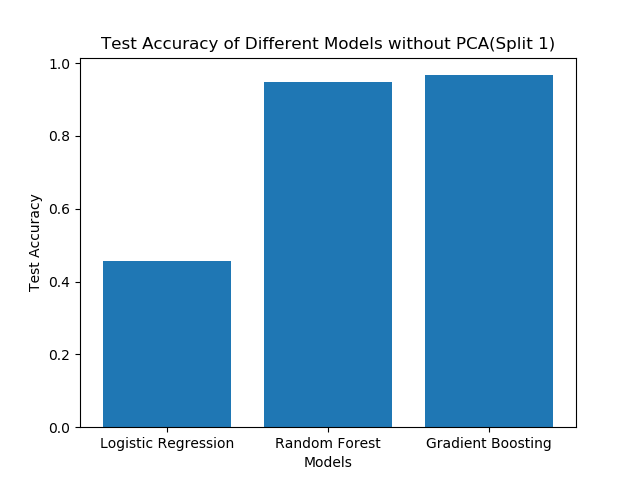

In [58]:
plt.figure()
labels=['Logistic Regression','Random Forest','Gradient Boosting']
values=[0.4566655274550012, 0.948131692868535, 0.9667931191615402]
plt.bar(labels,values)
plt.xlabel('Models');
plt.ylabel('Test Accuracy');
plt.title('Test Accuracy of Different Models without PCA(Split 1)');


**With PCA**

In [22]:
pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(1918, 2)
(214, 2)


In [28]:
logreg2=LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)
logreg2.fit(x_train_pca,y_train)
scores=cross_val_score(logreg2,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',logreg2.score(x_train_pca,y_train))

Mean cross Val score =  0.407736386420597
Accuracy on train data =  0.40198123044838374


In [29]:
rfc2=RandomForestClassifier()
rfc2.fit(x_train_pca,y_train)
scores=cross_val_score(rfc2,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',rfc2.score(x_train_pca,y_train))

Mean cross Val score =  0.679777853725222
Accuracy on train data =  0.9124087591240876


In [31]:
gbc2=GradientBoostingClassifier(n_estimators=100)
gbc2.fit(x_train_pca,y_train)
scores=cross_val_score(gbc2,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',gbc2.score(x_train_pca,y_train))

Mean cross Val score =  0.685041011619959
Accuracy on train data =  0.8190823774765381


<IPython.core.display.Javascript object>


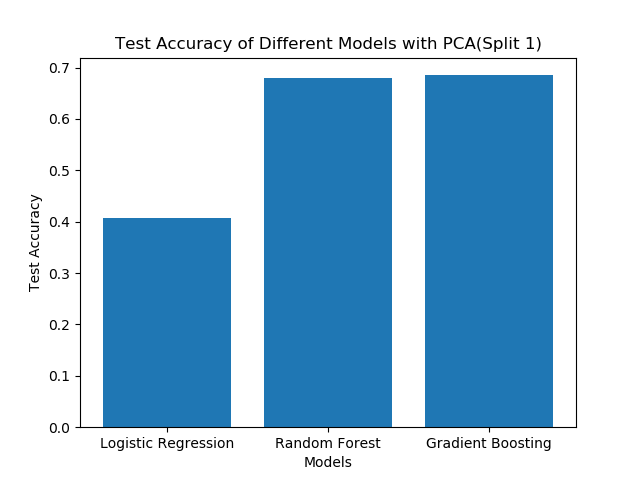

In [59]:
plt.figure()
labels=['Logistic Regression','Random Forest','Gradient Boosting']
values=[ 0.407736386420597, 0.67977785372522, 0.685041011619959]
f2=plt.bar(labels,values)
plt.xlabel('Models');
plt.ylabel('Test Accuracy');
plt.title('Test Accuracy of Different Models with PCA(Split 1)');


**PCA with 10 components**

In [31]:
pca=PCA(n_components=10)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(1918, 10)
(214, 10)


In [33]:
logreg3=LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)
logreg3.fit(x_train_pca,y_train)
scores=cross_val_score(logreg3,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',logreg3.score(x_train_pca,y_train))

Mean cross Val score =  0.407736386420597
Accuracy on train data =  0.4035453597497393


In [34]:
rfc3=RandomForestClassifier()
rfc3.fit(x_train_pca,y_train)
scores=cross_val_score(rfc3,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',rfc3.score(x_train_pca,y_train))

Mean cross Val score =  0.8869810890863523
Accuracy on train data =  0.9906152241918665


In [35]:
gbc3=GradientBoostingClassifier(n_estimators=100)
gbc3.fit(x_train_pca,y_train)
scores=cross_val_score(gbc3,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',gbc3.score(x_train_pca,y_train))

Mean cross Val score =  0.8535361130097971
Accuracy on train data =  0.9624608967674662


<IPython.core.display.Javascript object>


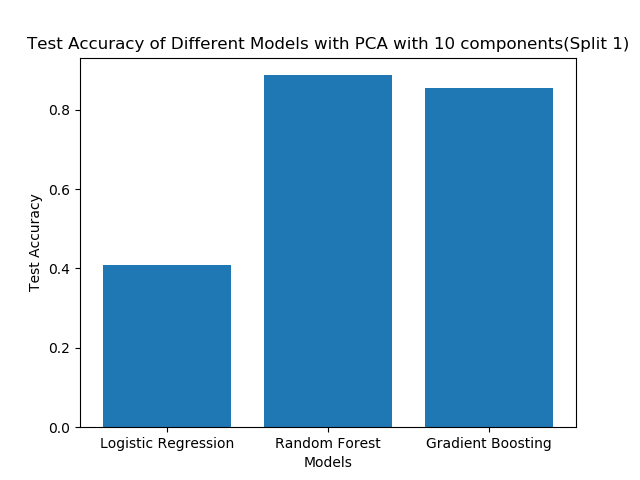

In [60]:
plt.figure()
labels=['Logistic Regression','Random Forest','Gradient Boosting']
values=[ 0.407736386420597, 0.8869810890863523,  0.8535361130097971]
f2=plt.bar(labels,values)
plt.xlabel('Models');
plt.ylabel('Test Accuracy');
plt.title('Test Accuracy of Different Models with PCA with 10 components(Split 1)');


**TRAIN - TEST SPLIT #2**

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1705, 2548)
(1705,)
(427, 2548)
(427,)


**WITHOUT PCA**

In [37]:
logreg=LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)
logreg.fit(x_train,y_train)
scores=cross_val_score(logreg,x_test,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',logreg.score(x_train,y_train))

Mean cross Val score =  0.4612153869953077
Accuracy on train data =  0.5143695014662757


In [38]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
scores=cross_val_score(rfc,x_test,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',rfc.score(x_train,y_train))

Mean cross Val score =  0.9413834888877428
Accuracy on train data =  0.9994134897360704


In [41]:
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
scores=cross_val_score(gbc,x_test,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',gbc.score(x_train,y_train))

Mean cross Val score =  0.969313669880885
Accuracy on train data =  1.0


<IPython.core.display.Javascript object>


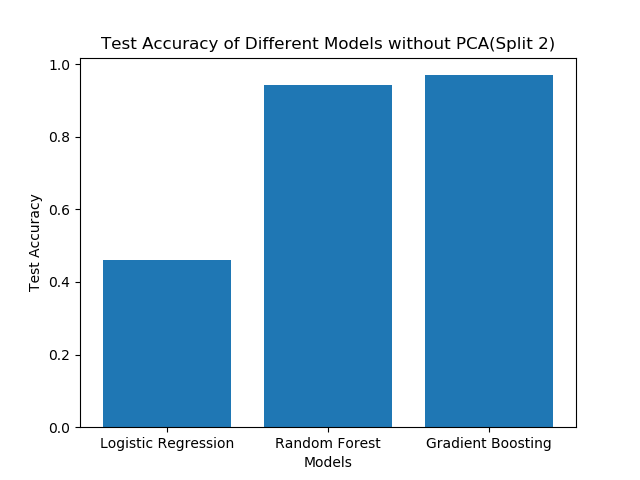

In [61]:
plt.figure()
labels=['Logistic Regression','Random Forest','Gradient Boosting']
values=[0.4612153869953077, 0.9413834888877428,  0.969313669880885]
f2=plt.bar(labels,values)
plt.xlabel('Models');
plt.ylabel('Test Accuracy');
plt.title('Test Accuracy of Different Models without PCA(Split 2)');


**WITH PCA**

In [42]:
pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(1705, 2)
(427, 2)


In [43]:
logreg2=LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)
logreg2.fit(x_train_pca,y_train)
scores=cross_val_score(logreg2,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',logreg2.score(x_train_pca,y_train))

Mean cross Val score =  0.3750464084979116
Accuracy on train data =  0.40703812316715543


In [44]:
rfc2=RandomForestClassifier()
rfc2.fit(x_train_pca,y_train)
scores=cross_val_score(rfc2,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',rfc2.score(x_train_pca,y_train))

Mean cross Val score =  0.7098025060588872
Accuracy on train data =  0.9126099706744868


In [45]:
gbc2=GradientBoostingClassifier(n_estimators=100)
gbc2.fit(x_train_pca,y_train)
scores=cross_val_score(gbc2,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',gbc2.score(x_train_pca,y_train))

Mean cross Val score =  0.7000992626205332
Accuracy on train data =  0.8258064516129032


<IPython.core.display.Javascript object>


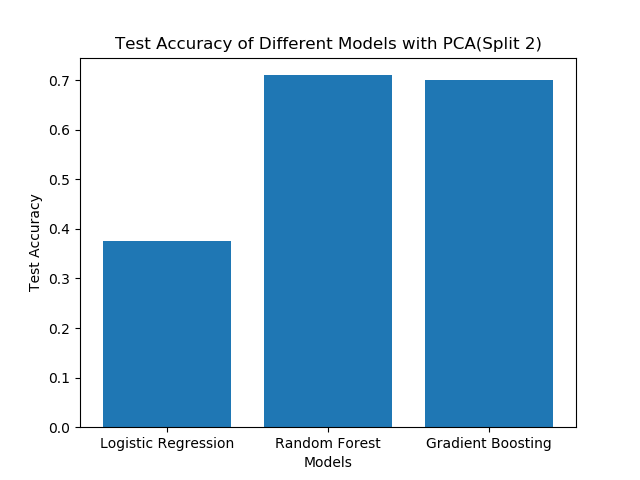

In [62]:
plt.figure()
labels=['Logistic Regression','Random Forest','Gradient Boosting']
values=[0.3750464084979116, 0.7098025060588872,  0.7000992626205332]
f2=plt.bar(labels,values)
plt.xlabel('Models');
plt.ylabel('Test Accuracy');
plt.title('Test Accuracy of Different Models with PCA(Split 2)');


**PCA WITH 10 COMPONENTS**

In [46]:
pca=PCA(n_components=10)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(1705, 10)
(427, 10)


In [47]:
logreg3=LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)
logreg3.fit(x_train_pca,y_train)
scores=cross_val_score(logreg3,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',logreg3.score(x_train_pca,y_train))

Mean cross Val score =  0.3750464084979116
Accuracy on train data =  0.4087976539589443


In [48]:
rfc3=RandomForestClassifier()
rfc3.fit(x_train_pca,y_train)
scores=cross_val_score(rfc3,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',rfc3.score(x_train_pca,y_train))

Mean cross Val score =  0.840542979425566
Accuracy on train data =  0.9853372434017595


In [49]:
gbc3=GradientBoostingClassifier(n_estimators=100)
gbc3.fit(x_train_pca,y_train)
scores=cross_val_score(gbc3,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',gbc3.score(x_train_pca,y_train))

Mean cross Val score =  0.840656422420461
Accuracy on train data =  0.9595307917888563


<IPython.core.display.Javascript object>


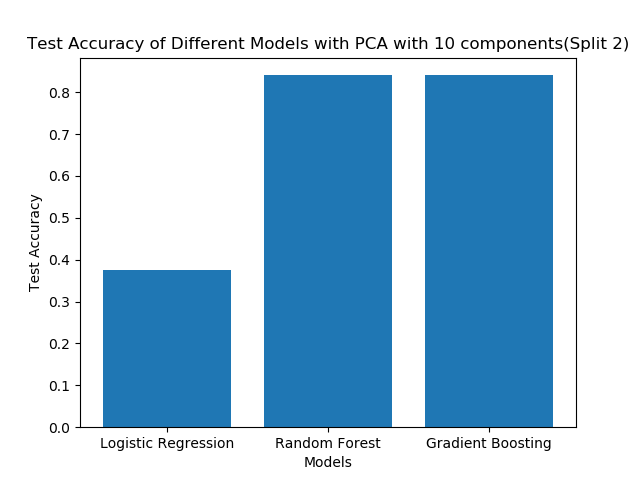

In [63]:
plt.figure()
labels=['Logistic Regression','Random Forest','Gradient Boosting']
values=[0.3750464084979116,  0.840542979425566, 0.840656422420461]
f2=plt.bar(labels,values)
plt.xlabel('Models');
plt.ylabel('Test Accuracy');
plt.title('Test Accuracy of Different Models with PCA with 10 components(Split 2)');


**TRAIN - TEST SPLIT #3**

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1492, 2548)
(1492,)
(640, 2548)
(640,)


**WTTHOUT PCA**

In [51]:
logreg=LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)
logreg.fit(x_train,y_train)
scores=cross_val_score(logreg,x_test,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',logreg.score(x_train,y_train))

Mean cross Val score =  0.4999286477411477
Accuracy on train data =  0.5107238605898123


In [52]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
scores=cross_val_score(rfc,x_test,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',rfc.score(x_train,y_train))

Mean cross Val score =  0.9687236721611722
Accuracy on train data =  0.9993297587131368


In [54]:
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
scores=cross_val_score(gbc,x_test,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',gbc.score(x_train,y_train))

Mean cross Val score =  0.9749744352869353
Accuracy on train data =  1.0


<IPython.core.display.Javascript object>


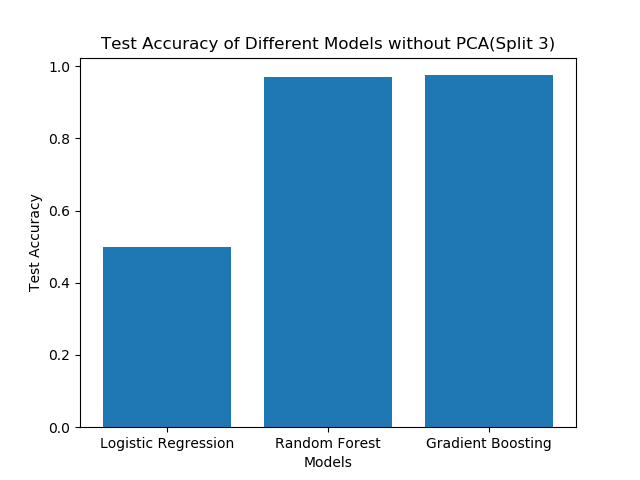

In [64]:
plt.figure()
labels=['Logistic Regression','Random Forest','Gradient Boosting']
values=[ 0.4999286477411477, 0.9687236721611722,  0.9749744352869353]
f2=plt.bar(labels,values)
plt.xlabel('Models');
plt.ylabel('Test Accuracy');
plt.title('Test Accuracy of Different Models without PCA(Split 3)');


**WITH PCA**

In [64]:
pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(1492, 2)
(640, 2)


In [56]:
logreg2=LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)
logreg2.fit(x_train_pca,y_train)
scores=cross_val_score(logreg2,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',logreg2.score(x_train_pca,y_train))

Mean cross Val score =  0.37357104700854704
Accuracy on train data =  0.40214477211796246


In [57]:
rfc2=RandomForestClassifier()
rfc2.fit(x_train_pca,y_train)
scores=cross_val_score(rfc2,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',rfc2.score(x_train_pca,y_train))

Mean cross Val score =  0.7078594322344323
Accuracy on train data =  0.8994638069705094


In [58]:
gbc2=GradientBoostingClassifier(n_estimators=100)
gbc2.fit(x_train_pca,y_train)
scores=cross_val_score(gbc2,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',gbc2.score(x_train_pca,y_train))

Mean cross Val score =  0.7001438492063492
Accuracy on train data =  0.8223860589812333


<IPython.core.display.Javascript object>


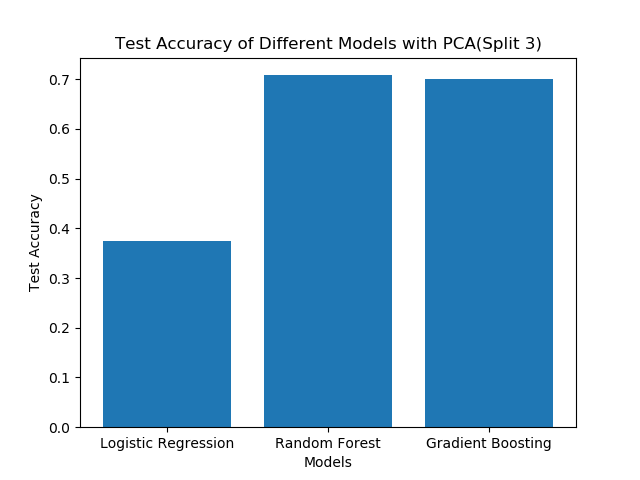

In [65]:
plt.figure()
labels=['Logistic Regression','Random Forest','Gradient Boosting']
values=[0.37357104700854704, 0.7078594322344323,  0.7001438492063492]
f2=plt.bar(labels,values)
plt.xlabel('Models');
plt.ylabel('Test Accuracy');
plt.title('Test Accuracy of Different Models with PCA(Split 3)');


**PCA WITH 10 COMPONENTS**

In [59]:
pca=PCA(n_components=10)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(1492, 10)
(640, 10)


In [60]:
logreg3=LogisticRegression(multi_class='multinomial',solver='saga',max_iter=200)
logreg3.fit(x_train_pca,y_train)
scores=cross_val_score(logreg3,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',logreg3.score(x_train_pca,y_train))

Mean cross Val score =  0.3876583485958486
Accuracy on train data =  0.403485254691689


In [61]:
rfc3=RandomForestClassifier()
rfc3.fit(x_train_pca,y_train)
scores=cross_val_score(rfc3,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',rfc3.score(x_train_pca,y_train))

Mean cross Val score =  0.8169993894993896
Accuracy on train data =  0.9919571045576407


In [62]:
gbc3=GradientBoostingClassifier(n_estimators=100)
gbc3.fit(x_train_pca,y_train)
scores=cross_val_score(gbc3,x_test_pca,y_test,cv=10,scoring='accuracy')
print('Mean cross Val score = ',scores.mean())
print('Accuracy on train data = ',gbc3.score(x_train_pca,y_train))

Mean cross Val score =  0.8312316849816849
Accuracy on train data =  0.9664879356568364


<IPython.core.display.Javascript object>


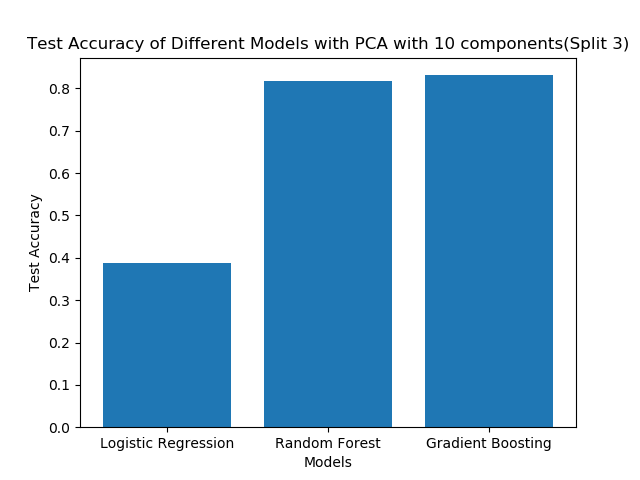

In [66]:
plt.figure()
labels=['Logistic Regression','Random Forest','Gradient Boosting']
values=[ 0.3876583485958486,  0.8169993894993896,  0.8312316849816849]
f2=plt.bar(labels,values)
plt.xlabel('Models');
plt.ylabel('Test Accuracy');
plt.title('Test Accuracy of Different Models with PCA with 10 components(Split 3)');
